# MILESTONE PHASE 0
>
`Kevin Boy Gunawan`
>
`FTDS-009`

## Perkenalan


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [80]:
df = pd.read_csv('supermarket_sales.csv')

In [81]:
df.head(8)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [83]:
df = df.rename(columns={
    'Invoice ID': 'invoice_id', 'Branch': 'branch', 'City': 'city', 'Customer type': 'cust_type',
    'Gender': 'gender', 'Product line': 'products', 'Unit price': 'unit_price', 'Quantity': 'qty', 
    'Tax 5%': 'tax5%', 'Total': 'total', 'Payment': 'payment', 'gross margin percentage': 'gross_margin',
    'gross income': 'gross_income', 'Rating': 'rating'}
    )

In [84]:
df['rating3'] = 'empty'
df['rating2'] = 'empty'
for i in range(df.shape[0]):
    df.iloc[i,-2] = df.iloc[i,16]/10*5
    if 5 >= df.iloc[i,-2] >4:
        df.iloc[i,-1] = 'Very Good'
    elif 4 >= df.iloc[i,-2] >3:
        df.iloc[i,-1] = 'Good'
    elif 3 >= df.iloc[i,-2] >2:
        df.iloc[i,-1] = 'Not Good'
    elif 2 >= df.iloc[i,-2] >1:
        df.iloc[i,-1] = 'Bad'
    else:
        df.iloc[i,-1] = 'Very Bad'
df = df.drop(columns='rating3')

In [85]:
df['branch_city'] = 'empty'
for i in range(df.shape[0]):
    df.iloc[i,-1] = df.iloc[i,2]+'/'+df.iloc[i,1]
df = df.drop(columns=['branch', 'city'])


In [86]:
df['hour'] = 0.0
df['minute'] = 0.0
for i in range(df.shape[0]):
    df.iloc[i,-2] = float(df.iloc[i,9][0:2])
    df.iloc[i,-1] = float(df.iloc[i,9][3:5])
    #df.iloc[i,-1] = str(round(float(df.iloc[i,9][0:2]) + float(df.iloc[i,9][3:5])/60, 0))

In [87]:
df.Date = pd.to_datetime(df.Date)

In [88]:
df['day'] = 0
df['month'] = 0
for i in range(df.shape[0]):
    df.iloc[i,-2] = int(df.iloc[i,8].day)
    df.iloc[i,-1] = int(df.iloc[i,8].month)

In [89]:
df.head(5)

,invoice_id,cust_type,gender,products,unit_price,qty,tax5%,total,Date,Time,...,cogs,gross_margin,gross_income,rating,rating2,branch_city,hour,minute,day,month
0,750-67-8428,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,...,522.83,4.761905,26.1415,9.1,Very Good,Yangon/A,13.0,8.0,5,1
1,226-31-3081,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,...,76.40,4.761905,3.8200,9.6,Very Good,Naypyitaw/C,10.0,29.0,8,3
2,631-41-3108,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,...,324.31,4.761905,16.2155,7.4,Good,Yangon/A,13.0,23.0,3,3
3,123-19-1176,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,...,465.76,4.761905,23.2880,8.4,Very Good,Yangon/A,20.0,33.0,27,1
4,373-73-7910,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,...,604.17,4.761905,30.2085,5.3,Not Good,Yangon/A,10.0,37.0,8,2


In [90]:
df['month'].max()

3

In [91]:
df.branch_city.unique().tolist()

['Yangon/A', 'Naypyitaw/C', 'Mandalay/B']

In [92]:
df.products.unique().tolist()

['Health and beauty',
 'Electronic accessories',
 'Home and lifestyle',
 'Sports and travel',
 'Food and beverages',
 'Fashion accessories']

In [93]:
df.payment.unique().tolist()

['Ewallet', 'Cash', 'Credit card']

In [94]:
df.cust_type.unique().tolist()

['Member', 'Normal']

In [95]:
df.rating.max(), df.rating.min()

(10.0, 4.0)

In [96]:
df.groupby(['payment', 'gender']).size()

payment      gender
Cash         Female    178
             Male      166
Credit card  Female    163
             Male      148
Ewallet      Female    160
             Male      185
dtype: int64

In [97]:
type_by_gender = df.groupby(['cust_type', 'gender']).size().unstack()
type_by_gender = pd.DataFrame(type_by_gender).reset_index()

In [98]:
type_by_gender

gender,cust_type,Female,Male
0,Member,261,240
1,Normal,240,259


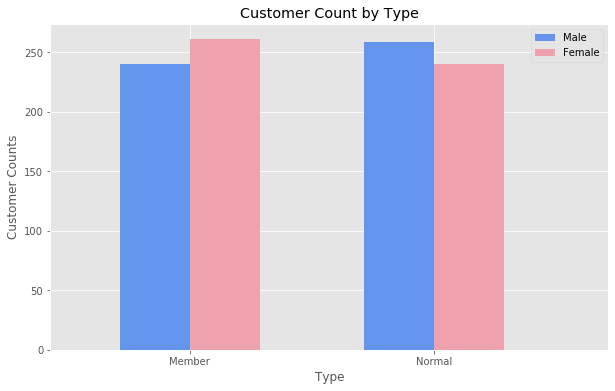

In [99]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(10,6))
    ind = np.array([0.5,1.2])
    w = 0.2
    plt.bar(ind, type_by_gender.Male, w, label='Male', color='#6495ED')
    plt.bar(ind+w, type_by_gender.Female, w, label='Female', color='#EEA2AD')
    plt.xlabel('Type')
    plt.ylabel('Customer Counts')
    plt.title('Customer Count by Type')
    plt.xticks(ind + w / 2, type_by_gender.cust_type)
    plt.xlim(0.2, 1.8)
    plt.legend(loc='best')
    plt.show()

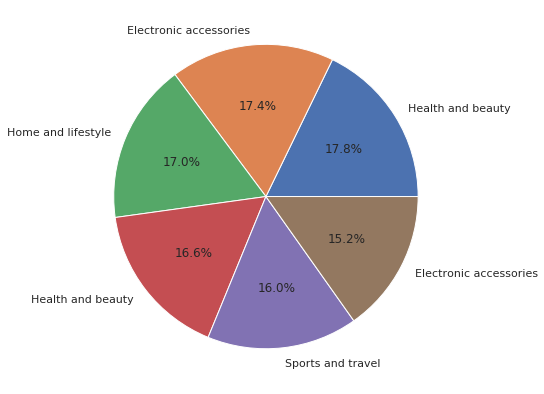

In [100]:
with plt.style.context('ggplot'):
    sns.set_theme()
    df.products.value_counts().plot(kind='pie', labels=df.products, autopct='%1.1f%%', figsize=(7,7), ylabel='')

In [101]:
product_by_gender = df.groupby(['products', 'gender']).size().unstack()
product_by_gender = pd.DataFrame(product_by_gender).reset_index()

In [102]:
product_by_gender

gender,products,Female,Male
0,Electronic accessories,84,86
1,Fashion accessories,96,82
2,Food and beverages,90,84
3,Health and beauty,64,88
4,Home and lifestyle,79,81
5,Sports and travel,88,78


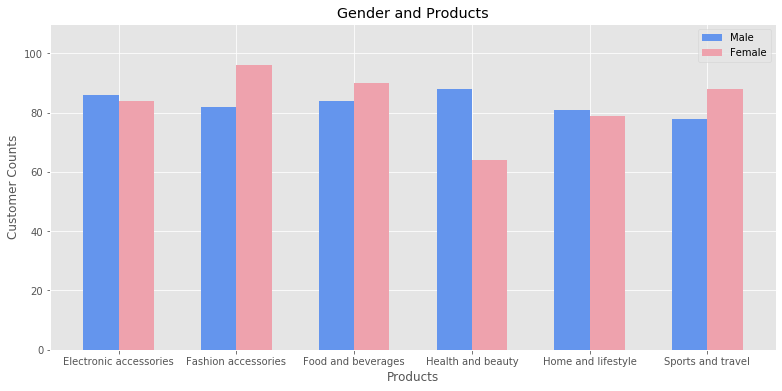

In [103]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(13,6))
    ind = np.arange(6)
    w = 0.3
    plt.bar(ind, product_by_gender.Male, w, label='Male', color='#6495ED')
    plt.bar(ind+w, product_by_gender.Female, w, label='Female', color='#EEA2AD')
    plt.xlabel('Products')
    plt.ylabel('Customer Counts')
    plt.title('Gender and Products')
    plt.xticks(ind + w / 2, product_by_gender.products)
    plt.ylim(0, 110)
    plt.legend(loc='best')
    plt.show()

In [104]:
sale_by_hour = df.groupby(['hour', 'minute']).size().reset_index(name='counts')

In [105]:
sale_by_hour.head()

,hour,minute,counts
0,10.0,0.0,3
1,10.0,1.0,2
2,10.0,2.0,3
3,10.0,3.0,1
4,10.0,4.0,1


C:\Users\Owner\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


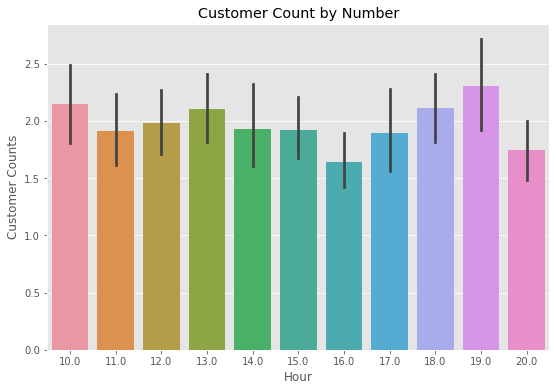

In [106]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(9,6))
    sns.barplot('hour', 'counts',  data = sale_by_hour)
    plt.title('Customer Count by Number') 
    plt.ylabel('Customer Counts')
    plt.xlabel('Hour')

In [107]:
df.head()

,invoice_id,cust_type,gender,products,unit_price,qty,tax5%,total,Date,Time,...,cogs,gross_margin,gross_income,rating,rating2,branch_city,hour,minute,day,month
0,750-67-8428,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,...,522.83,4.761905,26.1415,9.1,Very Good,Yangon/A,13.0,8.0,5,1
1,226-31-3081,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,...,76.40,4.761905,3.8200,9.6,Very Good,Naypyitaw/C,10.0,29.0,8,3
2,631-41-3108,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,...,324.31,4.761905,16.2155,7.4,Good,Yangon/A,13.0,23.0,3,3
3,123-19-1176,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,...,465.76,4.761905,23.2880,8.4,Very Good,Yangon/A,20.0,33.0,27,1
4,373-73-7910,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,...,604.17,4.761905,30.2085,5.3,Not Good,Yangon/A,10.0,37.0,8,2


In [108]:
rating_by_branch = df.groupby(['branch_city', 'rating2']).size().unstack()
rating_by_branch = pd.DataFrame(rating_by_branch).reset_index()

In [109]:
rating_by_branch

rating2,branch_city,Bad,Good,Not Good,Very Good
0,Mandalay/B,5,123,115,89
1,Naypyitaw/C,4,108,103,113
2,Yangon/A,2,120,112,106


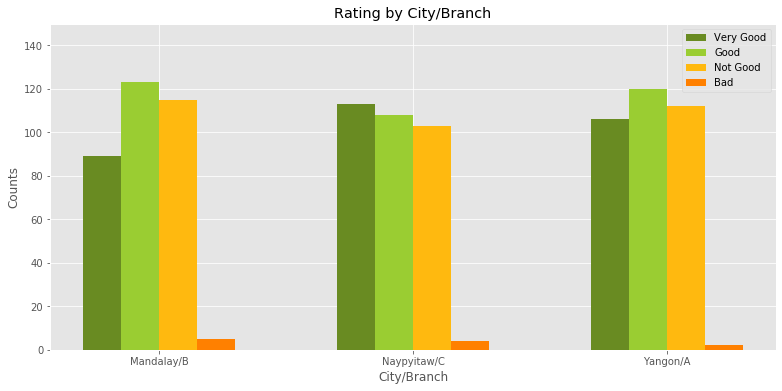

In [111]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(13,6))
    ind = np.arange(3)
    w = 0.15
    plt.bar(ind, rating_by_branch['Very Good'], w, label='Very Good', color='#698B22')
    plt.bar(ind+w, rating_by_branch['Good'], w, label='Good', color='#9ACD32')
    plt.bar(ind+2*w, rating_by_branch['Not Good'], w, label='Not Good', color='#FFB90F')
    plt.bar(ind+3*w, rating_by_branch['Bad'], w, label='Bad', color='#FF8000')
    plt.xlabel('City/Branch')
    plt.ylabel('Counts')
    plt.title('Rating by City/Branch')
    plt.xticks(ind + 3*w / 2, rating_by_branch.branch_city)
    plt.ylim(0, 150)
    plt.legend(loc='best')
    plt.show()

In [112]:
df.groupby('branch_city')['rating'].mean()

branch_city
Mandalay/B     6.818072
Naypyitaw/C    7.072866
Yangon/A       7.027059
Name: rating, dtype: float64

In [113]:
mandalay_rating = df[df['branch_city']=='Mandalay/B']['rating'].reset_index().drop(columns='index')
naypitaw_rating = df[df['branch_city']=='Naypyitaw/C']['rating'].reset_index().drop(columns='index')
yangon_rating = df[df['branch_city']=='Yangon/A']['rating'].reset_index().drop(columns='index')

In [179]:
mandalay_rating.mean()[0]

6.818072289156625

C:\Users\Owner\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


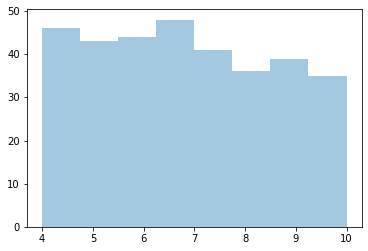

In [ ]:
sns.distplot(mandalay_rating, kde=False)

C:\Users\Owner\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


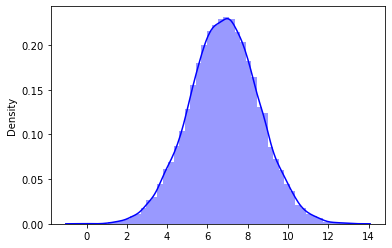

In [ ]:
mandalay_rating_pop = np.random.normal(mandalay_rating.mean(), mandalay_rating.std(), 20000)
sns.distplot(mandalay_rating_pop, label='Daily Income (Population)', color='blue')

In [ ]:
mandalay_rating_pop.mean()

6.816496605434528

C:\Users\Owner\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


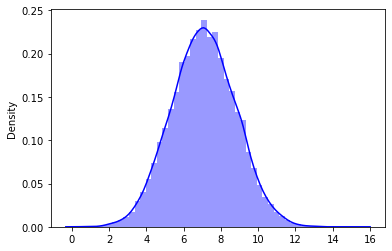

In [ ]:
naypitaw_rating_pop = np.random.normal(naypitaw_rating.mean(), naypitaw_rating.std(), 20000)
sns.distplot(naypitaw_rating_pop, label='Daily Income (Population)', color='blue')

In [114]:
naypitaw_rating_pop.mean()

7.069476262808367

In [115]:
branch_products_count = df.groupby(['branch_city','products'])['qty'].sum()
branch_products_count = pd.DataFrame(branch_products_count).reset_index()

In [166]:
branch_products_count.head(20)

,branch_city,products,qty
0,Mandalay/B,Electronic accessories,316
1,Mandalay/B,Fashion accessories,297
2,Mandalay/B,Food and beverages,270
3,Mandalay/B,Health and beauty,320
4,Mandalay/B,Home and lifestyle,295
5,Mandalay/B,Sports and travel,322
6,Naypyitaw/C,Electronic accessories,333
7,Naypyitaw/C,Fashion accessories,342
8,Naypyitaw/C,Food and beverages,369
9,Naypyitaw/C,Health and beauty,277


In [167]:
branch_products_count['products'][0:18:6]

0     Electronic accessories
6     Electronic accessories
12    Electronic accessories
Name: products, dtype: object

In [168]:
branch_products_count['qty'][0:18:6]

0     316
6     333
12    322
Name: qty, dtype: int64

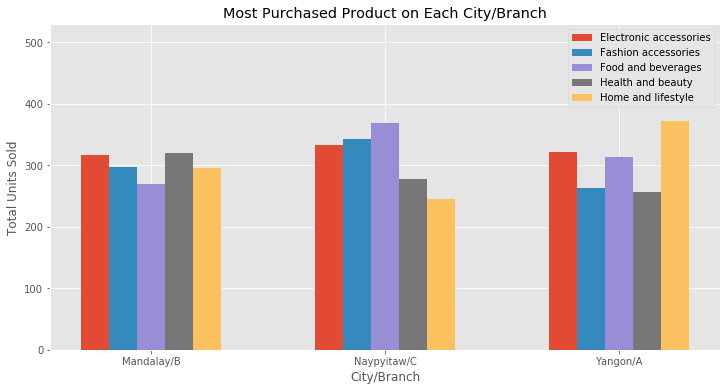

In [118]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(12,6))
    ind = np.arange(3)
    w = 0.12
    col = ['#698B22', '#9ACD32', '#FFB90F', '#FF9000', '#FF5000', '#FF0000']
    for i in range(5):
        plt.bar(ind+i*w, branch_products_count['qty'][i:18:6], w, label=branch_products_count['products'][i:18:6].loc[i])
    plt.xlabel('City/Branch')
    plt.ylabel('Total Units Sold')
    plt.title('Most Purchased Product on Each City/Branch')
    plt.xticks(ind + 4*w / 2, rating_by_branch.branch_city)
    plt.ylim(0, 530)
    plt.legend(loc='best')
    plt.show()

In [119]:
branch_products_revenue = df.groupby(['branch_city','products'])['total'].sum()
branch_products_revenue = pd.DataFrame(branch_products_revenue).reset_index()

In [120]:
branch_products_revenue.head(4)

,branch_city,products,total
0,Mandalay/B,Electronic accessories,17051.4435
1,Mandalay/B,Fashion accessories,16413.3165
2,Mandalay/B,Food and beverages,15214.8885
3,Mandalay/B,Health and beauty,19980.6600


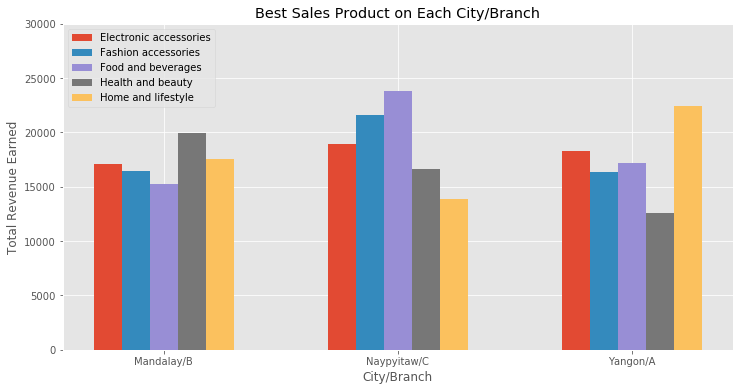

In [121]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(12,6))
    ind = np.arange(3)
    w = 0.12
    col = ['#698B22', '#9ACD32', '#FFB90F', '#FF9000', '#FF5000', '#FF0000']
    for i in range(5):
        plt.bar(ind+i*w, branch_products_revenue['total'][i:18:6], w, label=branch_products_revenue['products'][i:18:6].loc[i])
    plt.xlabel('City/Branch')
    plt.ylabel('Total Revenue Earned')
    plt.title('Best Sales Product on Each City/Branch')
    plt.xticks(ind + 4*w / 2, rating_by_branch.branch_city)
    plt.ylim(0, 30000)
    plt.legend(loc='best')
    plt.show()

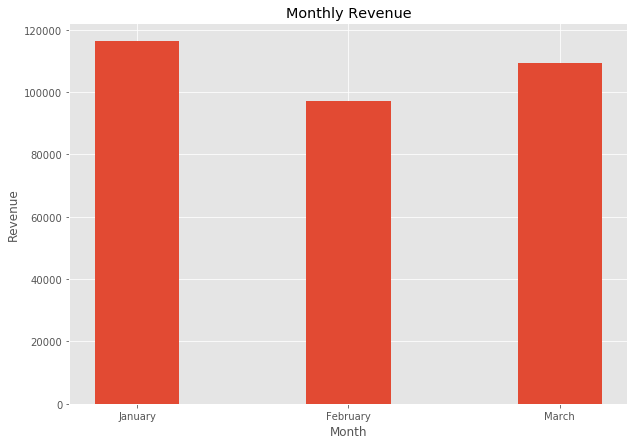

In [122]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(10,7))
    month_3 = np.array(['January', 'February', 'March'])
    plt.bar(month_3, df.groupby('month')['total'].sum(),0.4)
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.title('Monthly Revenue')

In [123]:
total_by_day = df.groupby(['month', 'day'])['total'].sum().unstack()

In [124]:
total_by_day = pd.DataFrame(total_by_day)

In [125]:
total_by_day

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,4745.1810,1945.5030,2078.1285,1623.6885,3536.6835,3614.2050,2834.2440,5293.7325,3021.3435,3560.9490,...,1704.7695,5994.1875,5402.0505,4700.3670,4457.5125,4635.8970,4999.7115,3516.5655,2558.2620,5232.4965
2,2444.5365,4140.9480,5467.9275,2439.4965,3031.1295,2905.4235,7228.2105,5084.6565,3271.8945,3141.0225,...,2442.3105,2339.5890,2722.4610,4807.2360,2408.1645,5859.4515,2097.0180,NaN,NaN,NaN
3,2634.3660,6560.3055,4853.1735,3894.4395,6230.8785,3092.5965,1438.2585,3125.3880,7474.0470,3163.2300,...,3179.1480,4095.0420,3477.4635,2272.9665,1962.5130,2902.8195,2229.4020,4023.2430,4487.0595,NaN


In [126]:
list_total_day = list(total_by_day.loc[1]) + list(total_by_day.loc[2]) + list(total_by_day.loc[3])


In [176]:
total_by_day.iloc[0]

day
1     4745.1810
2     1945.5030
3     2078.1285
4     1623.6885
5     3536.6835
6     3614.2050
7     2834.2440
8     5293.7325
9     3021.3435
10    3560.9490
11    2114.9625
12    5184.7635
13    2451.2040
14    3966.6165
15    5944.2600
16    4289.0820
17    3142.7550
18    2780.4735
19    4914.7245
20    3655.4490
21    2392.0995
22    1704.7695
23    5994.1875
24    5402.0505
25    4700.3670
26    4457.5125
27    4635.8970
28    4999.7115
29    3516.5655
30    2558.2620
31    5232.4965
Name: 1, dtype: float64

In [127]:
len(list_total_day)

93

In [128]:
list_total_day = [x for x in list_total_day if str(x) != 'nan']

In [129]:
len(list_total_day)

89

In [130]:
list_total_week = []
for i in range(12):
    #week[i] = list_total_day[0:7] list_total_day[7:14] list_total_day[14:21] list_total_day[21:28]
    list_total_week.append(sum(list_total_day[i*7:(i+1)*7])/7)
list_total_week.append(sum(list_total_day[84:90])/5)


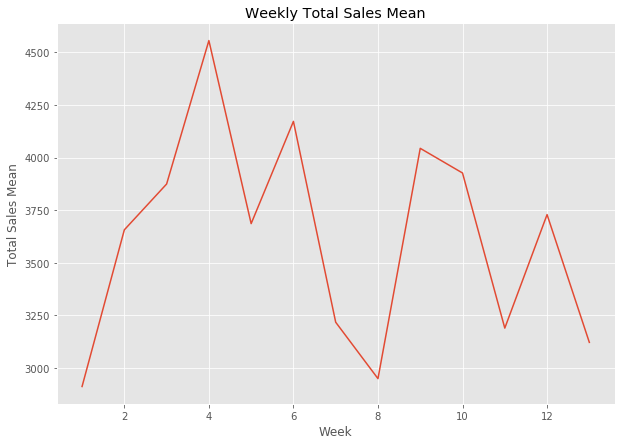

In [131]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(10,7))
    week = np.linspace(1,13, 13)
    plt.plot(week, np.array(list_total_week))
    plt.xlabel('Week')
    plt.ylabel('Total Sales Mean')
    plt.title('Weekly Total Sales Mean')
    plt.show()

In [169]:
df2 =pd.DataFrame({'week': list(np.linspace(1,13, 13)), 'val': list_total_week})

In [170]:
df2

,week,val
0,1.0,2911.0905
1,2.0,3656.2245
2,3.0,3874.1205
3,4.0,4556.3565
4,5.0,3685.7475
5,6.0,4172.0700
6,7.0,3216.7815
7,8.0,2948.5530
8,9.0,4043.8455
9,10.0,3926.5215


In [132]:
rating_day = df.groupby(['Date','rating2'])['rating2'].count().unstack().reset_index().set_index('Date')

rating2,Bad,Good,Not Good,Very Good
Date,,,,
2019-01-01,NaN,6.0,4.0,2.0
2019-01-02,NaN,3.0,5.0,NaN
2019-01-03,NaN,3.0,1.0,4.0
2019-01-04,NaN,3.0,2.0,1.0
2019-01-05,NaN,4.0,3.0,5.0
...,...,...,...,...
2019-03-26,NaN,4.0,6.0,3.0
2019-03-27,NaN,4.0,4.0,2.0
2019-03-28,NaN,2.0,4.0,4.0


In [133]:
rating_day.insert(0, 'Very Bad', 0)

In [141]:
rating_day = rating_day.replace(np.nan, 0)

In [151]:
rating_day['mean'] = df.groupby(['Date'])['rating'].mean()

In [160]:
rating_day['sum'] = rating_day.T.iloc[0:5].sum()

In [161]:
rating_day

rating2,Very Bad,Bad,Good,Not Good,Very Good,mean,sum
Date,,,,,,,
2019-01-01,0,0.0,6.0,4.0,2.0,6.583333,12.0
2019-01-02,0,0.0,3.0,5.0,0.0,6.050000,8.0
2019-01-03,0,0.0,3.0,1.0,4.0,8.112500,8.0
2019-01-04,0,0.0,3.0,2.0,1.0,6.516667,6.0
2019-01-05,0,0.0,4.0,3.0,5.0,7.433333,12.0
...,...,...,...,...,...,...,...
2019-03-26,0,0.0,4.0,6.0,3.0,6.623077,13.0
2019-03-27,0,0.0,4.0,4.0,2.0,6.760000,10.0
2019-03-28,0,0.0,2.0,4.0,4.0,7.050000,10.0


In [164]:
rating_day.iloc[0][0:6]

rating2
Very Bad     0.000000
Bad          0.000000
Good         6.000000
Not Good     4.000000
Very Good    2.000000
mean         6.583333
Name: 2019-01-01 00:00:00, dtype: float64

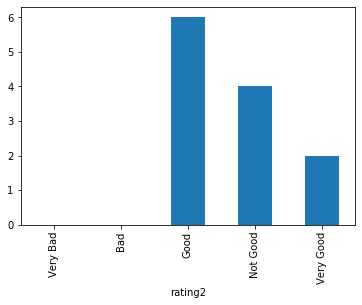

In [147]:
rating_day.iloc[0].plot(kind='bar')

In [149]:
rating_day.iloc[0].values

array([0., 0., 6., 4., 2.])

In [150]:
rating_day2 = df.groupby(['Date'])['rating'].mean()
rating_day2

Date
2019-01-01    6.583333
2019-01-02    6.050000
2019-01-03    8.112500
2019-01-04    6.516667
2019-01-05    7.433333
                ...   
2019-03-26    6.623077
2019-03-27    6.760000
2019-03-28    7.050000
2019-03-29    6.925000
2019-03-30    6.800000
Name: rating, Length: 89, dtype: float64